<H1> Correlation of discrete signals </H1>

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Correlation is a measurement of how similar two signals. The <B>cross correlation</B> allows us to measure the similiarity between two signals at different lag positions.

In [15]:
# Sin function to generate signals

delay = 1.2 # ms

f = lambda x : np.sin(x) # original signal
g = lambda x : np.sin(x - delay)

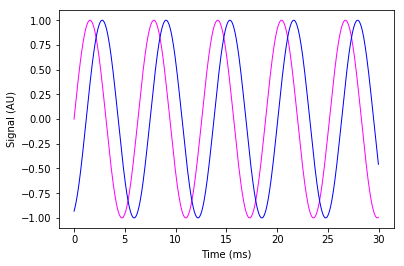

In [16]:
dt = 0.05 # sampling interval (in ms)
time = np.arange(start = 0, stop = 30.00, step = dt) # sample 30 ms seconds at 20 kHz (100 samples)

# generate signals
A, B = f(time), g(time)

# Plot signals
plt.plot(time, A, lw=1, color = 'magenta');
plt.plot(time, B, lw=1, color = 'blue');
plt.xlabel('Time (ms)');
plt.ylabel('Signal (AU)');

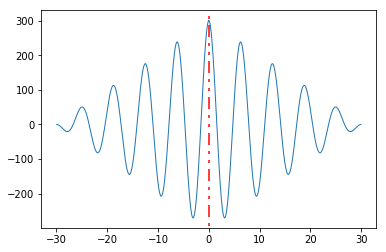

In [17]:
# compute signal autocorrelation

coor = np.correlate(A, A, 'full')
maxlag = coor.size/2

lag = np.arange(-maxlag+1, maxlag+1)*dt

plt.plot(lag, coor, lw=1);
line = plt.axvline(x=0, ymin=-40, ymax = 50, linewidth=1.5, color='r')
line.set_dashes([8, 4, 2, 4, 2, 4]) 

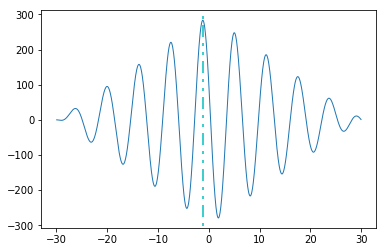

In [18]:
# compute cross correlation

coor = np.correlate(A, B, 'full')
maxlag = (coor.size-1)/2 
lag = np.arange(-maxlag, maxlag+1)*dt

# plot cross correlogram with line about 1 ms
plt.plot(lag, coor, lw=1);
line = plt.axvline(x=-delay, ymin=np.min(coor), ymax = np.max(coor), linewidth=1.5, color='c')
line.set_dashes([8, 4, 2, 4, 2, 4])

In [19]:
# Calculate lag position of maximal correlation
def lag_ix(x,y):

    corr = np.correlate(x,y,mode='full')
    pos_ix = np.argmax( np.abs(corr) )
    lag_ix = pos_ix - (corr.size-1)/2
    return lag_ix

lag_ix(A,B)

-24.0

In [20]:
delay_estimation = -lag_ix(A,B)*dt
delay_estimation

1.2000000000000002

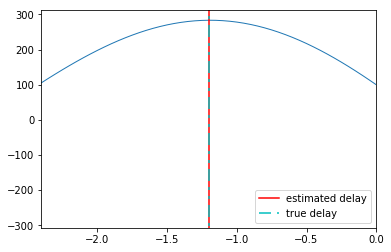

In [21]:
plt.plot(lag, coor, lw=1);
line = plt.axvline(x=-delay_estimation, ymin=-40, ymax = 50,
                   linewidth=1.5, color='r', label='estimated delay')
line = plt.axvline(x=-delay, ymin=np.min(coor), ymax = np.max(coor),
                   linewidth=1.5, color='c', label='true delay')

line.set_dashes([8, 4, 2, 4, 2, 4]) 
plt.xlim(-2*delay, 0)

plt.legend(loc='lower right');

In [1]:
import threading
import time


class ThreadingExample(object):
    """ Threading example class
    The run() method will be started and it will run in the background
    until the application exits.
    """

    def __init__(self, interval=1):
        """ Constructor
        :type interval: int
        :param interval: Check interval, in seconds
        """
        self.interval = interval

        thread = threading.Thread(target=self.run, args=())
        thread.daemon = True                            # Daemonize thread
        thread.start()                                  # Start the execution

    def run(self):
        """ Method that runs forever """
        for i in range(5):
            # Do something
            print('Doing something imporant in the background')

            time.sleep(self.interval)

example = ThreadingExample()
time.sleep(3)
print('Checkpoint')
time.sleep(2)
print('Bye')

Doing something imporant in the background
Doing something imporant in the background
Doing something imporant in the background
Checkpoint
Doing something imporant in the background
Doing something imporant in the background
Bye


In [17]:
aar=['a','b']
b=[1,2,4]
import numpy as np
# np.where(aar=='a')
# np.where(b,1)
A = ['apple', 'orange', 'apple', 'banana']
A=np.array(A)
arr_index = np.where(A == 'orange')
A[arr_index]

array(['orange'], 
      dtype='<U6')

In [19]:
import feedparser
NewsFeed = feedparser.parse("https://timesofindia.indiatimes.com/rssfeedstopstories.cms")
entry = NewsFeed.entries[1]
entry

{'guidislink': False,
 'id': 'https://timesofindia.indiatimes.com/india/farmers-protest-bring-opposition-parties-together/articleshow/66889639.cms',
 'link': 'https://timesofindia.indiatimes.com/india/farmers-protest-bring-opposition-parties-together/articleshow/66889639.cms',
 'links': [{'href': 'https://timesofindia.indiatimes.com/india/farmers-protest-bring-opposition-parties-together/articleshow/66889639.cms',
   'rel': 'alternate',
   'type': 'text/html'}],
 'published': 'Fri, 30 Nov 2018 22:01:25 GMT',
 'published_parsed': time.struct_time(tm_year=2018, tm_mon=11, tm_mday=30, tm_hour=22, tm_min=1, tm_sec=25, tm_wday=4, tm_yday=334, tm_isdst=0),
 'summary': "Addressing the two-day farmers' protest at Parliament Street, the political leaders also backed the demand for passage of legislation guaranteeing ‘freedom from indebtedness' and ‘remunerative prices' in line with recommendations of the Swaminathan Commission. The meeting saw opposition leaders attack PM Narendra Modi, saying 

In [21]:
entry.keys()

dict_keys(['title', 'title_detail', 'summary', 'summary_detail', 'links', 'link', 'id', 'guidislink', 'published', 'published_parsed'])